<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_27_Intervalo_de_Confianza_para_la_variabilidad_de_la_poblaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Calcular intervalos de confianza de la variabilidad de los datos en una poblaciín  apartir de estadístcos de una muestra



# Descripción

A partir de datos de una muestra como lo es la varianza y la desviación estándar se pretende calcular e inferir sobre la variabilidad que tendría la población basado en el intérvalos de confianza.

Se presenta dos ejercicios que describen como determinar el intervalo de confianza de la variabilidad de una población Se necesita el valor de $n$ tamaño de la muestra o de los grados de libertad $(n-1)$ y se necesita el nivel de confianza que puede ser $0.90, 0.95 o 0.99$.

* Cargar librerías
* Cargar funciones
* Definir el contexto de cada ejercicio
* Identificar y definir datos iniciales
* Calcular intervalos de confianza
* Interprtr cada ejercicio y el caso



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats





## Cargar funciones



# Fundamento teórico

La distribución *chi cuadrada* se puede usar para estimar el valor de la varianza y la desviación estándar es decir la variabilidad de una población. Entonces, la distribución chi cuadrada sirve para estimar el parámetro de la variabilidad de una población usando la muestra.

## Fórmula para calcular intervalo de confianza  (IC) de la variabildiad de los datos de la población

$$
IC = \frac{{(n-1)s^2}}{{\chi^2_{1 - \alpha/2, n-1}}}, \frac{{(n-1)s^2}}{{\chi^2_{\alpha/2, n-1}}}
$$

La fórmula describe y separa el intervalo con una coma, del lado izquierdo sería el valor del inferior del intervalo y del lado derecho de la coma sería el valor superior del intervalo.

De donde:

- $n$ es el tamaño de la muestra.
- $(n-1)$ son los grados de libertad.
- $s^2$ es la varianza muestral.
- $\chi^2_{\alpha/2, n-1}$ y
- $\chi^2_{1-\alpha/2, n-1}$ son son los cuantiles de la distribución *chi-cuadrado* con
$𝑛−1$ grados de libertad correspondientes a los valores $𝛼/2$ y 1−𝛼/2 respectivamente.

¿Que es el valor del alfa? $α$ es el valor de la probabilidad a cierto nivel de confianza.

Si el valor del nivel de confianza es del $90%$ $α$ representa el 10% repartido a dos colas izquierda y derecha entonces $α/2$ representa 0.05 tanto por la derecha como a la izquierda.

Si el valor del nivel de confianza es del $95%$ $α$ representa el 5% repartido a dos colas izquierda y derecha entonces $α/2$ equivale $0.05/2 =0.25$ tanto por la derecha como a la izquierda.

Si se trata de chi cuadrada al 95% de confianza en la fórmula se expresa $\alpha/2$ cola a izquierda que significa el 0.25 de probabilidad cola a la izquierda y $1 - \alpha/2$ representa la probabilidad del lado derecho o cola a la derecha.


## Cargar librerías


In [53]:
# Función que devuelve la variabilida de los datos de una población
def f_IC_variabilidad(varianza, gl, confianza):

    print ("Confianza: ", confianza)
    print ("Valor de n: ", n, "; Valor de gl:", gl)
    print ("La varianza", np.round(varianza, 4))
    alpha = 1 - confianza
    x_izquierda = stats.chi2.ppf(alpha / 2, df=gl)  # Izquierda
    x_derecha = stats.chi2.ppf(1 - alpha / 2, df=gl)  # Derecha
    print ("Alpha: ", np.round(alpha, 4))
    print ("x_izquierda: ", np.round(x_izquierda, 4))
    print ("x_derecha: ", np.round(x_derecha, 4))
    IC = [None, None]
    IC[0] = gl * varianza / x_derecha
    IC[1] = gl * varianza / x_izquierda
    return IC

def f_areas_chi_cuadrada_confianza(gl):
    # Valores críticos de chi-cuadrado para diferentes niveles de confianza
    niveles_confianza = [0.90, 0.95, 0.99]
    colores = ['r', 'g', 'b']
    x = np.linspace(0, 25, 1000)  # Valores para la distribución chi-cuadrado
    y = stats.chi2.pdf(x, gl)  # Densidad de probabilidad

    # Crear los gráficos
    plt.figure(figsize=(18, 6))
    for i, confianza in enumerate(niveles_confianza, start=1):
        alpha = 1 - confianza
        alpha_2 = alpha / 2
        x_izquierda = stats.chi2.ppf(alpha_2, gl)
        x_derecha = stats.chi2.ppf(1 - alpha_2, gl)

        plt.subplot(1, 3, i)
        plt.plot(x, y, 'b-', label=f'Distribución Chi-cuadrado, GL={gl}')
        plt.fill_between(x, 0, y, where=(x <= x_izquierda), color=colores[i-1], alpha=0.5, label=f'Área α/2 = {alpha_2:.4f}')
        plt.fill_between(x, 0, y, where=(x >= x_derecha), color=colores[i-1], alpha=0.5, label=f'Área 1-α/2 = {1 - alpha_2:.4f}')
        plt.axvline(x_izquierda, color=colores[i-1], linestyle='--', label=f'χ²(α/2) = {x_izquierda:.4f}')
        plt.axvline(x_derecha, color=colores[i-1], linestyle='--', label=f'χ²(1-α/2) = {x_derecha:.4f}')
        plt.xlabel('Valor')
        plt.ylabel('Densidad de probabilidad')
        plt.title(f'Distribución Chi-cuadrado, {confianza*100}% de confianza')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()




## Visualizar niveles de confianza

A ciertos nivels de confianza del 90%, 95% y y 99% se presentan las tes gráficas a ciertos grados de libertad.


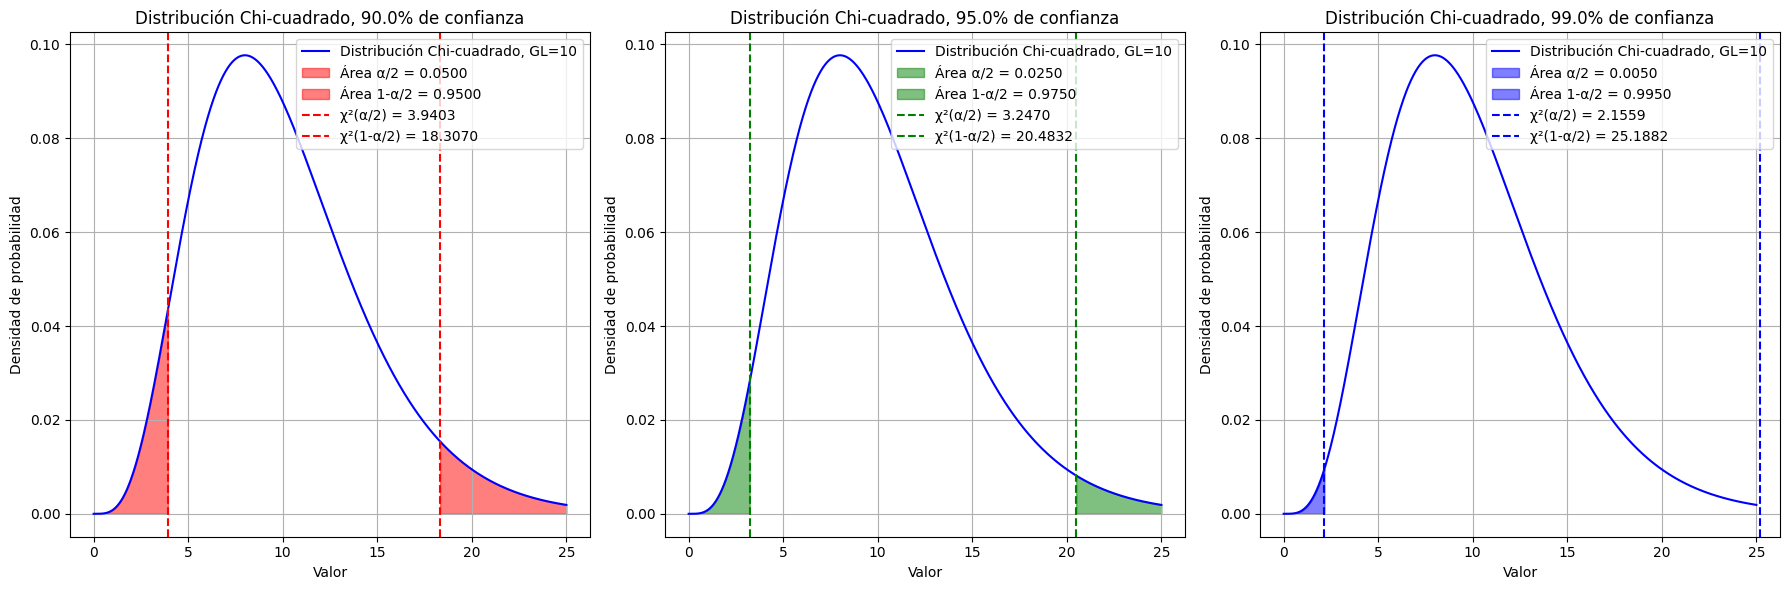

In [22]:
# Ejemplo de uso
f_areas_chi_cuadrada_confianza(10)

## Obtener el valor de x a partir la probabilidad

En Python existe la función Inversa de la función de distribución acumulativa (ppf): Calcula el valor de  x  que corresponde a una probabilidad acumulada específica, lo que es útil para determinar umbrales o cuantiles.

Por ejemplo, ¿cuál es el valor de x cuando la probabiliad es 0.025 a 10 grados de libertad?

* $confianza = 95$%
* $alfa = 1 - confianza = 0.05$
* $alfa / 2 = 0.25$
* $1 - alfa / 2 = 0.975$




In [23]:
gl = 10  # Por ejemplo, 10 grados de libertad
confianza = 95/100 # 0.95
alpha = 1 - confianza # 0.05
alpha_izquierda = alpha / 2
alpha_derecha = 1 - alpha / 2

print ("Confianza= ", confianza)
print("Alpha = ", np.round(alpha, 4))
print("Alpha a la izquierda=", np.round(alpha_izquierda, 4))
print("Alpha a la derecha= ", np.round(alpha_derecha, 4))
print()
valor_x = stats.chi2.ppf(alpha_izquierda, gl)

print("El valor de  sería: ", valor_x)

Confianza=  0.95
Alpha =  0.05
Alpha a la izquierda= 0.025
Alpha a la derecha=  0.975

El valor de  sería:  3.246972780236842


Por ejemplo, ¿cuál es el valor de x cuando la probabilidad es 0.025 a 10 grados de libertad a la derecha?

In [24]:
gl = 10  # Por ejemplo, 10 grados de libertad
valor_x = stats.chi2.ppf(alpha_derecha, gl)

print("El valor de X sería: ", valor_x)

El valor de X sería:  20.483177350807388


# Desarrollo

Se presentan vrios ercicios e donde se calcula el n´tervalo de conianza de la variabilidad de los datos de una población a partir de los etadístios de una muestra.

## Ejercicio 1. Varianza de 0.0025 a 95% de confianza y 19 grados de libertad

¿Cual seria el intervalo de confianza si de una  muestra $n=20$ con una varianza de $0.0025$, a 19 grados de libertdad $(n-1) = 19 gl$ y al 95% de confianza.

$$
IC = \frac{{(n-1)s^2}}{{\chi^2_{1 - \alpha/2, n-1}}}, \frac{{(n-1)s^2}}{{\chi^2_{\alpha/2, n-1}}}
$$

$$
\therefore \text{sustituyendo}
$$


$$
IC = \frac{19\cdot 0.0025}{32.8523}, \frac{19\cdot 0.0025}{8.9065}
$$

$$
IC = 0.0014, 0.0053
$$


In [40]:
confianza = 95/100
n = 20
gl = n -1
varianza = 0.0025
IC = f_IC_variabilidad(varianza, gl, confianza)
print ("Intervalo de confianza ; ", np.round(IC, 4))

Confianza:  0.95
Valor de n:  20 ; Valor de gl: 19
La varianza 0.0025
Alpha:  0.050000000000000044
x_izquierda:  8.906516481987973
x_derecha:  32.85232686172969
Intervalo de confianza ;  [0.0014 0.0053]


### Ejercicio . Con datos de una muestra

Estos son datos de una muestra
{157,186,179,163,171,154,177,165,168}

Determine el intervalo de confianza de la variabilidad de la población.

$$
IC = \frac{{(n-1)s^2}}{{\chi^2_{1 - \alpha/2, n-1}}}, \frac{{(n-1)s^2}}{{\chi^2_{\alpha/2, n-1}}}
$$

$$
\therefore \text{sustituyendo}
$$


$$
IC = \frac{8\cdot 97.6543}{17.5345}, \frac{8\cdot 97.6543}{2.1797}
$$

$$
IC =  44.554,   358.4087
$$





In [44]:
datos = [157,186,179,163,171,154,177,165,168]
print (datos)
confianza = 95/100
n = len(datos)
gl = n-1

varianza = np.var(datos)


IC = f_IC_variabilidad(varianza, gl, confianza)
print ("Intervalo de confianza ; ", np.round(IC, 4))


[157, 186, 179, 163, 171, 154, 177, 165, 168]
Confianza:  0.95
Valor de n:  9 ; Valor de gl: 8
La varianza 97.6543
Alpha:  0.05
x_izquierda:  2.1797
x_derecha:  17.5345
Intervalo de confianza ;  [ 44.554  358.4087]


El valor de la varianza de los datos en la pobación debe estar en un rango o intervalo entre  [ 44.554  y 358.4087]

### Ejercicio 3

Se tiene una meustra de $n=25$ estudiantes midiendo la estatura de cada uno de ellos, se tiene que la varianza de la muestra es de $s^2 = 10$ centímetros (cms). ¿Cuál es el intervalo de confianza de la variabilidad de toda la población a un $95$% de confianza?

$$
IC = \frac{{(n-1)s^2}}{{\chi^2_{1 - \alpha/2, n-1}}}, \frac{{(n-1)s^2}}{{\chi^2_{\alpha/2, n-1}}}
$$

$$
\therefore \text{sustituyendo}
$$


$$
IC = \frac{24\cdot 10}{39.3641}, \frac{24\cdot 10}{12.4012}
$$

$$
IC =  6.0969, 19.353
$$


In [54]:
confianza = 95/100
n = 25
gl = n - 1
varianza = 10
IC = f_IC_variabilidad(varianza, gl, confianza)
print ("Intervalo de confianza ; ", np.round(IC, 4))

Confianza:  0.95
Valor de n:  25 ; Valor de gl: 24
La varianza 10
Alpha:  0.05
x_izquierda:  12.4012
x_derecha:  39.3641
Intervalo de confianza ;  [ 6.0969 19.353 ]


El valor de la varianza de los datos en la pobación debe estar en un rango o intervalo entre El valor de la varianza de los datos en la pobación debe estar en un rango o intervalo entre 6.0969 y 19.353

# Interpretación

- Del Ejercicio 1 calcule los intervalos de confianza al $90$% y $99$% respectvamente a los mismos grados de libertdad.
- - Del Ejercicio 2 calcule los intervalos de confianza al 90% y 99% respectivamente a los mismos grados de libertdad.

- Del Ejercicio 3 calcule los intervalos de confianza al $90$% y $99$% respectivamente a los mismos grados de libertdad.

